In [12]:
# Import necessary libraries
import numpy as np
import tensorflow as tf  # For loading the MNIST dataset
from sklearn.svm import SVC  # For training the SVM classifier
from sklearn.metrics import accuracy_score  # For evaluating the classifier
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.manifold import TSNE  # For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the MNIST dataset from TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the images from 28x28 to 784-dimensional vectors
X_train = X_train.reshape(-1, 28*28)  # Reshape into 2D array
X_test = X_test.reshape(-1, 28*28)

# Normalize the pixel values to range [0, 1]
X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
#Reduce dimensionality with PCA for faster SVM training
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_model = SVC(kernel='linear')

svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)

In [14]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy on MNIST test data: {accuracy * 100:.2f}%")

SVM Accuracy on MNIST test data: 93.73%


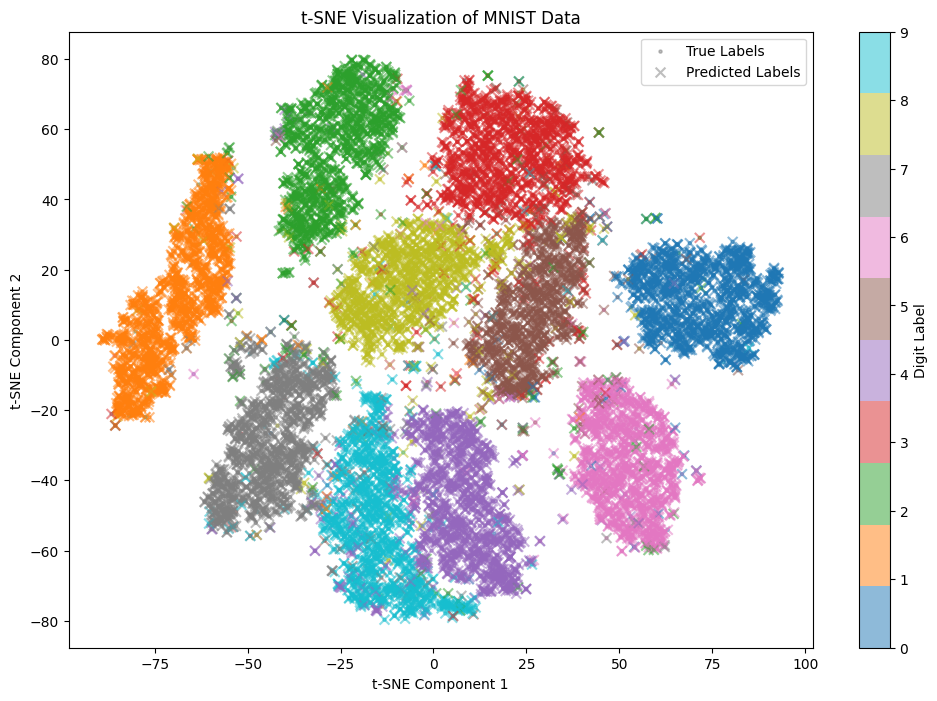

In [15]:
def plot_tsne(X, y, y_pred=None):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(12, 8))

    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=5, alpha=0.5, label='True Labels')
    if y_pred is not None:
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, marker='x', cmap='tab10', s=50, alpha=0.5, label='Predicted Labels')

    plt.colorbar(scatter, label='Digit Label')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('t-SNE Visualization of MNIST Data')
    plt.legend()
    plt.show()

# Plot the t-SNE visualization for test data with true and predicted labels
plot_tsne(X_test_pca, y_test, y_pred)


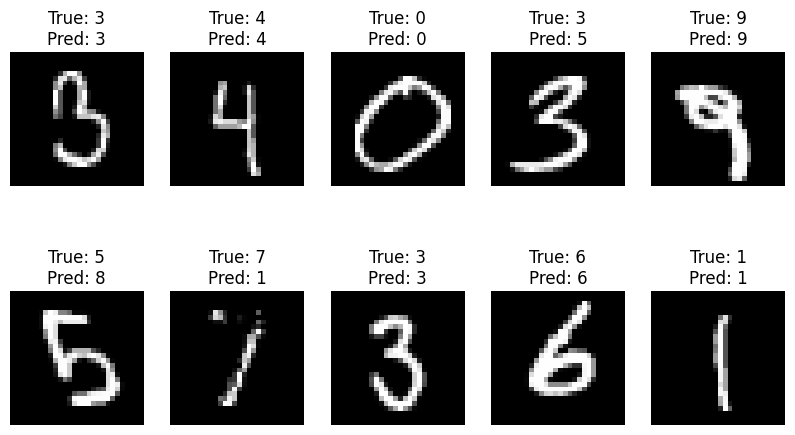

In [16]:
def plot_sample_predictions(X, y_true, y_pred, num_samples=10):
    plt.figure(figsize=(10, 15))
    indices = np.random.choice(len(X), num_samples, replace=False)

    for i, index in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X[index].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_true[index]}\nPred: {y_pred[index]}")
        plt.axis('off')

    plt.show()

# Plot a few sample images with their true and predicted labels
plot_sample_predictions(X_test, y_test, y_pred)

Using KNN Algorithim

In [17]:
# Import necessary libraries
import numpy as np
import tensorflow as tf  # For loading the MNIST dataset
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier from scikit-learn
from sklearn.metrics import accuracy_score  # For calculating accuracy
from sklearn.decomposition import PCA  # To reduce dimensionality for faster KNN training
import matplotlib.pyplot as plt

In [18]:
# Load the MNIST dataset from TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the images from 28x28 to 784-dimensional vectors
X_train = X_train.reshape(-1, 28*28)  # Reshape into 2D array
X_test = X_test.reshape(-1, 28*28)

# Normalize the pixel values to range [0, 1]
X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0


In [19]:

# Reduce dimensionality with PCA for faster KNN training
pca = PCA(n_components=50)  # Reduce to 50 dimensions for faster KNN training
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize KNN model (using 5 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the MNIST training data
knn_model.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test_pca)

In [20]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy on MNIST test data: {accuracy * 100:.2f}%")

KNN Accuracy on MNIST test data: 97.47%


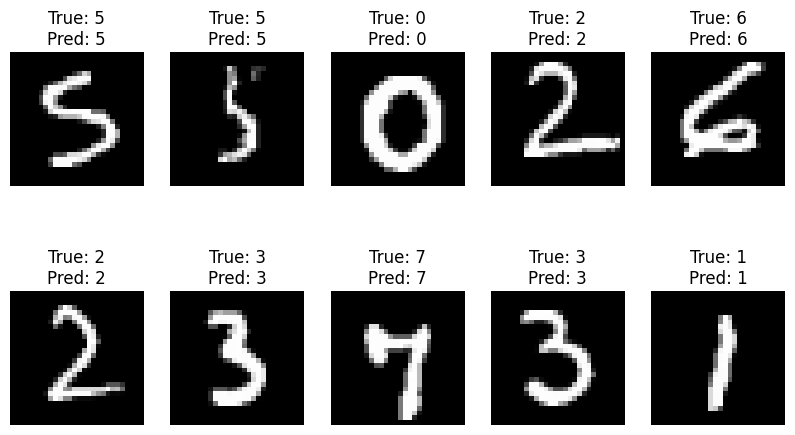

In [21]:
def plot_sample_predictions(X, y_true, y_pred, num_samples=10):
    plt.figure(figsize=(10, 15))
    indices = np.random.choice(len(X), num_samples, replace=False)

    for i, index in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X[index].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_true[index]}\nPred: {y_pred[index]}")
        plt.axis('off')

    plt.show()

# Plot a few sample images with their true and predicted labels
plot_sample_predictions(X_test, y_test, y_pred)